# Proyek Analisis Data: Bike Sharing System

## Menentukan Pertanyaan Bisnis

Bike sharing system merupakan sebuah rental sepeda dimana user dengan mudah merental sepeda pada sebuah tempat tertentu dan mengembalikannya sesuai pada tempat yang tersedia. System rental sepeda tentunya memiliki pengaruh penting dalam lalu lintas, lingkukan dan kesehatan.

Bike sharing system memperoleh data dari proses pemakaian usernya pada tahun 2011 sampai 2012 dari Capital Bikeshare System untuk kota Washington D.C., USA. Data yang diperoleh memiliki korelasi dengan cuaca, hari, musim, jam, dan lain sebagainya, sehingga dapat mempengaruhi perilaku user untuk menggunakan sepeda.

1. Apakah kondisi musim dan cuaca mempengaruhi jumlah user? 
2. Bagaimana perkembangan jumlah user berdasarkan bulannya?
3. Pada jam berapa user bike sharing system paling sering digunakan?

## Menyiapkan semua library yang dibutuhkan

In [4]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

## Data Wrangling

### Gathering Data

In [5]:
hour = pd.read_csv('hour.csv')

In [6]:
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Dataset characteristics

Berikut merupakan keterangan dari kolom yang terdapat pada **hour.csv** 
    
    - instant: record index
	- dteday : date
	- season : season (1:springer, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2011, 1:2012)
	- mnth : month ( 1 to 12)
	- hr : hour (0 to 23)
	- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
	- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
	- hum: Normalized humidity. The values are divided to 100 (max)
	- windspeed: Normalized wind speed. The values are divided to 67 (max)
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

### Assesing data

In [7]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


1. Saya akan merubah nama column karena column tersebut disingkat-singkat
2. column instant berarti record index, pada dasarnya pandas sudah memiliki index tersendiri, sehingga tidak membutuhkan index lagi. Saya melakukan drop column karena tidak dibutuhkan
3. dteday bertype object, sehingga perlu merubahnya menjadi type datetime

-----------------------------------------------------------------

In [8]:
hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


4. Berdasarkan dataset characteristic, column:
    - temp valuenya telah dibagi 41
    - atemp valuenya telah dibagi 50
    - hum valuenya telah dibagi 100
    - windspeed valuenya telah dibagi 67
    
5. Pada dataset **hour** column `atemp`, `hum`, dan `windspeed` memiliki minimal value 0.0000, sehingga dapat dikatakan **inaccurate data**

Kebanyakan value berbentuk numerik, akan tetapi mereka sebenernya kategori berdasarkan dataset characteristic sehingga saya tidak mengecek apakah data tersebut terdapat duplicate atau tidak

--------------------------------------------------------------

In [9]:
for column in hour.columns:
    na_value = hour[f"{column}"].isna().sum()
    print(f"hour na value of {column}: {na_value}", )

hour na value of instant: 0
hour na value of dteday: 0
hour na value of season: 0
hour na value of yr: 0
hour na value of mnth: 0
hour na value of hr: 0
hour na value of holiday: 0
hour na value of weekday: 0
hour na value of workingday: 0
hour na value of weathersit: 0
hour na value of temp: 0
hour na value of atemp: 0
hour na value of hum: 0
hour na value of windspeed: 0
hour na value of casual: 0
hour na value of registered: 0
hour na value of cnt: 0


Melihat value yang kosong pada hour, dapat dilihat **tidak ada value yang kosong pada dataset ini**

----------------------------------------------

## Cleaning Data

### 1. Mengganti nama kolom

In [10]:
hour.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
hour.rename(columns={'dteday': 'date', 
                    'yr': 'year',
                    'mnth': 'month',
                    'hr': 'hour',
                    'weekday': 'week_day',
                    'workingday': 'working_day',
                    'weathersit': 'weather_sit',
                    'temp': 'temprature',
                    'atemp': 'feel_temprature',
                    'hum': 'humidity',
                    'windspeed': 'wind_speed',
                    'casual': 'casual_user',
                    'registered': 'registered_user',
                    'cnt': 'total_user'}, inplace=True)

In [12]:
hour.columns

Index(['instant', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'week_day', 'working_day', 'weather_sit', 'temprature',
       'feel_temprature', 'humidity', 'wind_speed', 'casual_user',
       'registered_user', 'total_user'],
      dtype='object')

Nama column telah berganti, sehingga memudahkan untuk dibaca

---------------------------------------------------------------

### 2. Melakukan drop pada column instant

In [13]:
hour.drop('instant', axis=1, inplace=True)

In [14]:
hour.head()

,date,season,year,month,hour,holiday,week_day,working_day,weather_sit,temprature,feel_temprature,humidity,wind_speed,casual_user,registered_user,total_user
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Column instant telah didrop Karena berisi index, pandas dasarnya telah memiliki index jadi instant tidak dibutuhkan lagi

--------------------------------

### 3. Mengubah type column `date` menjadi type datetime

In [15]:
hour.date[:5]

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: date, dtype: object

In [16]:
hour.date = pd.to_datetime(hour.date)

In [17]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             17379 non-null  datetime64[ns]
 1   season           17379 non-null  int64         
 2   year             17379 non-null  int64         
 3   month            17379 non-null  int64         
 4   hour             17379 non-null  int64         
 5   holiday          17379 non-null  int64         
 6   week_day         17379 non-null  int64         
 7   working_day      17379 non-null  int64         
 8   weather_sit      17379 non-null  int64         
 9   temprature       17379 non-null  float64       
 10  feel_temprature  17379 non-null  float64       
 11  humidity         17379 non-null  float64       
 12  wind_speed       17379 non-null  float64       
 13  casual_user      17379 non-null  int64         
 14  registered_user  17379 non-null  int64

--------------------------------------------------------------

### 4. Mengembalikan value column

Berdasarkan dataset characteristic, column:
   1. `temprature` valuenya telah dibagi 41
   2. `feel_temprature` valuenya telah dibagi 50
   3. `humidity` valuenya telah dibagi 100
   4. `wind_speed` valuenya telah dibagi 67


Bermadsud untuk mengembalikan value untuk memudahkan dalam analisis

In [18]:
hour[['temprature', 'feel_temprature', 'humidity', 'wind_speed']].head()

,temprature,feel_temprature,humidity,wind_speed
0,0.24,0.2879,0.81,0.0
1,0.22,0.2727,0.80,0.0
2,0.22,0.2727,0.80,0.0
3,0.24,0.2879,0.75,0.0
4,0.24,0.2879,0.75,0.0


In [19]:
changes = ['temprature', 'feel_temprature', 'humidity', 'wind_speed']
for change in changes:
    if change == 'temprature':
        hour[f'{change}'] = round(hour[f'{change}']*41, 2)
    elif change == 'feel_temprature':
        hour[f'{change}'] = round(hour[f'{change}']*50, 2)
    elif change == 'humidity':
        hour[f'{change}'] = round(hour[f'{change}']*100, 2)
    elif change == 'wind_speed':
        hour[f'{change}'] = round(hour[f'{change}']*67, 2)

In [20]:
hour[['temprature', 'feel_temprature', 'humidity', 'wind_speed']].sample(5)

,temprature,feel_temprature,humidity,wind_speed
8906,13.94,15.91,87.0,15.0
8215,10.66,15.15,70.0,0.0
10977,20.50,24.24,22.0,13.0
1758,24.60,31.06,53.0,15.0
2065,11.48,13.64,93.0,17.0


Dengan mengembalikan kolom tersebut ke value semula, kita dimudahkan untuk memahami kondisi pada setiap columnnya, akan tetapi masih terdapat **inaccurate data** sehingga saya perlu memanipulasinya

----------------------------------------------

### 5. Memanipulasi "hour"  pada column `feel_temprature`, `humidity`, dan `wind_speed`

In [21]:
hour.describe()

,season,year,month,hour,holiday,week_day,working_day,weather_sit,temprature,feel_temprature,humidity,wind_speed,casual_user,registered_user,total_user
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,20.376474,23.788484,62.722884,12.736233,35.676218,153.786869,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,7.894801,8.592587,19.292983,8.196891,49.305030,151.357286,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,13.940000,16.660000,48.000000,7.000000,4.000000,34.000000,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,20.500000,24.240000,63.000000,13.000000,17.000000,115.000000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,27.060000,31.060000,78.000000,17.000000,48.000000,220.000000,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,41.000000,50.000000,100.000000,57.000000,367.000000,886.000000,977.000000


In [22]:
hour[['feel_temprature', 'humidity', 'wind_speed']].describe()

,feel_temprature,humidity,wind_speed
count,17379.000000,17379.000000,17379.000000
mean,23.788484,62.722884,12.736233
std,8.592587,19.292983,8.196891
min,0.000000,0.000000,0.000000
25%,16.660000,48.000000,7.000000
50%,24.240000,63.000000,13.000000
75%,31.060000,78.000000,17.000000
max,50.000000,100.000000,57.000000


In [23]:
conditions = ['feel_temprature', 'humidity', 'wind_speed']
for condition in conditions:
    hasil = hour[hour[f'{condition}'] == 0][f'{condition}'].count()
    print(f"{condition} memiliki 0 value sebanyak: {hasil}")

feel_temprature memiliki 0 value sebanyak: 2
humidity memiliki 0 value sebanyak: 22
wind_speed memiliki 0 value sebanyak: 2180


In [24]:
hour.loc[hour['feel_temprature'] == 0, 'feel_temprature'] = 24.24
hour.loc[hour['humidity'] == 0, 'humidity'] = 63.00
hour.loc[hour['wind_speed'] == 0, 'wind_speed'] = 12.73

In [25]:
hour[['feel_temprature', 'humidity', 'wind_speed']].describe()

,feel_temprature,humidity,wind_speed
count,17379.000000,17379.000000,17379.000000
mean,23.791274,62.802635,14.333069
std,8.588798,19.163309,6.655089
min,0.760000,8.000000,6.000000
25%,16.660000,48.000000,9.000000
50%,24.240000,63.000000,13.000000
75%,31.060000,78.000000,17.000000
max,50.000000,100.000000,57.000000


1. Untuk column `feel_temprature` dan `humidity` saya memanipulasi value 0 dengan **median** dari masing-masing kolom, karena jumlah value yang 0 tidak terlalu banyak

2. Pada colum `wind_speed` saya memanipulasi value 0 dengan **nilai rata-ratanya** karena datanya lumayan banyak sehingga mean bisa mempresentasikan datanya

------------------------------------------------------------

### 6. Merubah column `season`

Pada Dataset characteristics terdapat keterangan tentang column `season`, yaitu:
   - springer = 1
   - summer = 2
   - fall = 3
   - winter = 4

Saya mengubah data tersebut untuk mempermudah pemahaman datanya

In [26]:
hour.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [28]:
hour['season'] = hour['season'].apply(lambda x: 'springer' if x == 1 else x)
hour['season'] = hour['season'].apply(lambda x: 'summer' if x == 2 else x)
hour['season'] = hour['season'].apply(lambda x: 'fall' if x == 3 else x)
hour['season'] = hour['season'].apply(lambda x: 'winter' if x == 4 else x)

hour.season.unique()

array(['springer', 'summer', 'fall', 'winter'], dtype=object)

Dengan mengubah value pada column season yang sebelumnya berupa numerik menjadi nama season itu sendiri, membuat kita memahami arti dari datanya

----------------------------------------------------------

### 7. Merubah column `year`

Pada Dataset characteristics terdapat keterangan tentang column `year`, yaitu:
- 2011 = 0
- 2012 = 1

Saya mengubah data tersebut untuk mempermudah pemahaman datanya

In [29]:
hour.year.value_counts()

1    8734
0    8645
Name: year, dtype: int64

In [30]:
hour['year'] = hour['year'].apply(lambda x: 2011 if x == 0 else x)
hour['year'] = hour['year'].apply(lambda x: 2012 if x == 1 else x)
hour.year.unique()

array([2011, 2012], dtype=int64)

Dapat dilihat persebaran tahun pada kedua dataset itu merata, setelah kita mengubah valuenya

--------------------------------------------------------------

### 8. Merubah column `month`

Melakukan perubahan untuk memahami data dengan mudah sesuai dengan bulannya

In [31]:
hour.month = pd.to_datetime(hour.month, format='%m').dt.strftime('%b')

In [32]:
hour.month.unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

Melalui perubahan ini, kita bisa melihat persebaran datanya tergantung bulannya

----------------------------------------------------

### 10. Merubah column `week_day`

Melalui data characteristics dijelaskan bahwa **hour** merupakan data yang diperoleh dari system bike di kota Washington, yang berarti sunday merupakan hari pertama dalam hitungan minggu di US

In [33]:
hour.week_day.value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: week_day, dtype: int64

In [35]:
hour['week_day'] = hour['week_day'].apply(lambda x: 'monday' if x == 0 else x)
hour['week_day'] = hour['week_day'].apply(lambda x: 'tuesday' if x == 1 else x)
hour['week_day'] = hour['week_day'].apply(lambda x: 'wednesday' if x == 2 else x)
hour['week_day'] = hour['week_day'].apply(lambda x: 'thursday ' if x == 3 else x)
hour['week_day'] = hour['week_day'].apply(lambda x: "friday" if x == 4 else x)
hour['week_day'] = hour['week_day'].apply(lambda x: 'saturday' if x == 5 else x)
hour['week_day'] = hour['week_day'].apply(lambda x: 'sunday' if x == 6 else x)

hour.week_day.unique()

array(['sunday', 'monday', 'tuesday', 'wednesday', 'thursday ', 'friday',
       'saturday'], dtype=object)

------------------------------------------

### 10.  Merubah column `weather_sit`

Pada dataset characteristics dijelaskan bahwa:
- Clear, Few clouds, Partly cloudy, Partly cloudy = 1
- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = 2
- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds = 3
- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = 4

Penjelasan pada dataset characteristics untuk column `weather_sit` terlalu panjang, jadi saya menggunakan kondisi yang sering muncul pada masing-masing arti pada `weather_sit`, yaitu:

- Clear = 1
- Mist = 2
- Light Rain = 3
- Heavy Rain = 4

In [36]:
hour.weather_sit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weather_sit, dtype: int64

In [37]:
hour['weather_sit'] = hour['weather_sit'].apply(lambda x: 'clear' if x == 1 else x)
hour['weather_sit'] = hour['weather_sit'].apply(lambda x: 'mist' if x == 2 else x)
hour['weather_sit'] = hour['weather_sit'].apply(lambda x: 'light rain' if x == 3 else x)
hour['weather_sit'] = hour['weather_sit'].apply(lambda x: 'heavy rain' if x == 4 else x)

In [38]:
hour.weather_sit.unique()

array(['clear', 'mist', 'light rain', 'heavy rain'], dtype=object)

Melalui perubahan data tersebut, kita bisa melihat bahwa pada dataset day hanya terjadi 3 `weather_sit` yaitu mist, clear, dan light rain, sedangkan pada dataset hour terjadi 4 weather_sit yaitu  mist, clear, light rain, dan heavy rain

----------------------------------------------------

### 11. Merubah column `working_day` dan `holiday`

Pada Dataset characteristics dijelaskan bahwa `working_day : if day is neither weekend nor holiday is 1, otherwise is 0`. Maka, saya akan merubah column working_day menjadi yes(1) atau no(0)

Misalnya, jika hari ini adalah hari Selasa, maka ekspresi bernilai 1 karena hari Selasa bukanlah akhir pekan atau hari libur. Namun, jika hari ini adalah hari Sabtu, maka ekspresi bernilai 0 karena hari Sabtu adalah akhir pekan.

Begitu juga dengan column `holiday`, yang berarti apakah pada hari tersebut liburan(1) atau tidak(0)

In [39]:
hour.working_day.value_counts()

1    11865
0     5514
Name: working_day, dtype: int64

In [40]:
hour['working_day'] = hour['working_day'].apply(lambda x: 'no' if x == 0 else x)
hour['working_day'] = hour['working_day'].apply(lambda x: 'yes' if x == 1 else x)

In [41]:
hour.working_day.value_counts()

yes    11865
no      5514
Name: working_day, dtype: int64

In [42]:
hour.holiday.value_counts()

0    16879
1      500
Name: holiday, dtype: int64

In [43]:
hour['holiday'] = hour['holiday'].apply(lambda x: 'no' if x == 0 else x)
hour['holiday'] = hour['holiday'].apply(lambda x: 'yes' if x == 1 else x)

In [44]:
hour.holiday.value_counts()

no     16879
yes      500
Name: holiday, dtype: int64

------------------------------------------------------------------------------

## Exploratory Data Analysis (EDA)

### Explore 

Bike sharing system merupakan sebuah rental sepeda dimana user dengan mudah merental sepeda pada sebuah tempat tertentu dan mengembalikannya sesuai pada tempat yang tersedia. System rental sepeda tentunya memiliki pengaruh penting dalam lalu lintas, lingkukan dan kesehatan. 

Bike sharing system memperoleh data dari proses pemakaian usernya pada tahun 2011 sampai 2012 dari Capital Bikeshare System untuk kota Washington D.C., USA. Data yang diperoleh memiliki korelasi dengan cuaca, hari, musim, jam, dan lain sebagainya, sehingga dapat mempengaruhi perilaku user untuk menggunakan sepeda. 

Berdasarkan penjelasan tersebut, dapat didefinisikan pertanyaan sebagai berikut:
1. Apakah kondisi musim dan cuaca mempengaruhi jumlah user?
2. Bagaimana perkembangan jumlah user berdasarkan bulannya?
3. Pada jam berapa user bike sharing system paling sering digunakan? 

In [45]:
hour.sample(5)

,date,season,year,month,hour,holiday,week_day,working_day,weather_sit,temprature,feel_temprature,humidity,wind_speed,casual_user,registered_user,total_user
13614,2012-07-26,fall,2012,Jul,11,no,friday,yes,clear,32.80,40.15,66.0,15.0,69,143,212
16807,2012-12-08,winter,2012,Dec,2,no,sunday,no,mist,14.76,17.42,93.0,9.0,3,67,70
13187,2012-07-08,fall,2012,Jul,16,no,monday,no,mist,32.80,40.15,66.0,15.0,65,226,291
17111,2012-12-20,winter,2012,Dec,18,no,friday,yes,mist,13.94,16.66,71.0,13.0,22,359,381
1908,2011-03-25,summer,2011,Mar,7,no,saturday,yes,clear,8.20,9.09,59.0,24.0,4,100,104


In [46]:
hour.describe()

,year,hour,temprature,feel_temprature,humidity,wind_speed,casual_user,registered_user,total_user
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2011.502561,11.546752,20.376474,23.791274,62.802635,14.333069,35.676218,153.786869,189.463088
std,0.500008,6.914405,7.894801,8.588798,19.163309,6.655089,49.305030,151.357286,181.387599
min,2011.000000,0.000000,0.820000,0.760000,8.000000,6.000000,0.000000,0.000000,1.000000
25%,2011.000000,6.000000,13.940000,16.660000,48.000000,9.000000,4.000000,34.000000,40.000000
50%,2012.000000,12.000000,20.500000,24.240000,63.000000,13.000000,17.000000,115.000000,142.000000
75%,2012.000000,18.000000,27.060000,31.060000,78.000000,17.000000,48.000000,220.000000,281.000000
max,2012.000000,23.000000,41.000000,50.000000,100.000000,57.000000,367.000000,886.000000,977.000000


Pada dataset hour didapatkan data dengan jumlah 17379 yang artinya data tersebut diperoleh selama 1739 jam. Didapatkan bahwa rata-rata user menggunakan bike sharing pada jam 12 kurang (tertera pada rata-rata hour 11,54). Diketahui rata-ratanya sebanyak 181,38 total user menggunakan bike sharing system perjamnya. 

In [47]:
hour.weather_sit.value_counts()

clear         11413
mist           4544
light rain     1419
heavy rain        3
Name: weather_sit, dtype: int64

Disimpulkan bahwa `weather_sit` didominasi oleh clear sedangkan heavy rain dengan jumlah paling sedikit

In [48]:
work_vs_day = hour.groupby(by=['hour']).agg({
    'casual_user': 'sum',
    'registered_user': 'sum',
    'total_user': 'sum'
}).sort_values(by='hour', ascending=True).reset_index()

work_vs_day

,hour,casual_user,registered_user,total_user
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428
5,5,1012,13249,14261
6,6,3017,52115,55132
7,7,8037,146134,154171
8,8,15761,245240,261001
9,9,22458,136980,159438


Berikut merupakan rata-rata user pada tiap jamnya

In [49]:
hour.season.value_counts()

fall        4496
summer      4409
springer    4242
winter      4232
Name: season, dtype: int64

<Axes: >

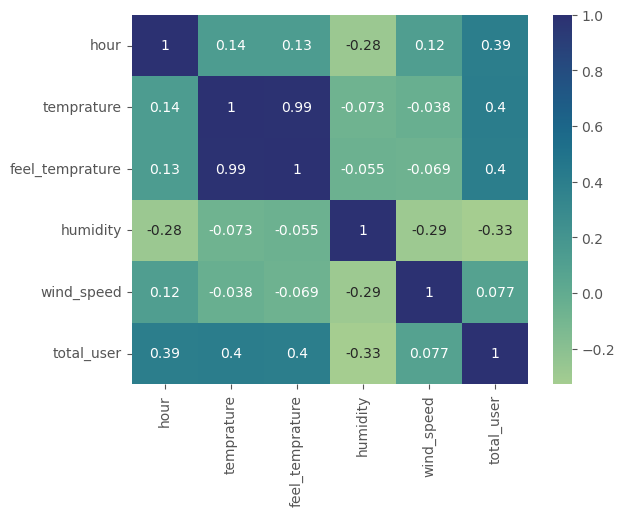

In [50]:
corr = hour[['hour', 'temprature', 'feel_temprature', 'humidity', 'wind_speed', 'total_user']].corr()
sns.heatmap(data=corr, annot=True, cmap='crest')

Diketahui bahwa korelasi `total_user` dengan `column hour, temprature, dan feel_temparature` mendapatkan value **positif**, sehingga memiliki korelasi yang kuat. 

Column `wind_speed` walaupun positif nilainya cukup kecil, terdapat juga column `humidity` yang bervalue **negatif** terhadap `total_user` sehingga column `wind_speed` dan `humidity` **tidak memiliki korelasi** karena nilainya mendekati nol.

## Visualization & Explanatory Analysis

### 1. Apakah kondisi musim dan cuaca mempengaruhi jumlah user?

In [192]:
season_user = hour.groupby('season').agg({
    'total_user': 'sum'
}).reset_index().sort_values(by='total_user', ascending=False)

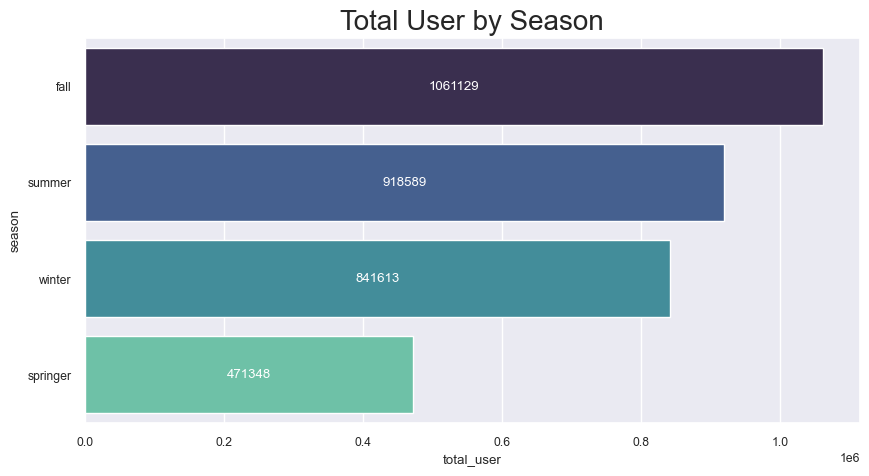

In [180]:
plt.figure(figsize=(10,5))
plt.title('Total User by Season', size=20)
sns.set(font_scale=0.8)
graph = sns.barplot(data=season_user, x='total_user', y='season', orient='h', palette='mako')
for i in graph.containers:
    graph.bar_label(i, fmt='%d', label_type='center', color='white')
plt.show()


Berdasarkan plot diatas disimpulkan bahwa kebanyakan user menggunakan sepeda ketika musim gugur/fall sebanyak 1 juta lebih user, diikuti oleh*musim panas/summer dengan 900rb user dan musim dingin/winter dengan 800rb user, serta musim dengan jumlah user paling sedikit yaitu musim gugur/springer dengan 470rb user.

--------------------------------------------------

In [191]:
weather_user = hour.groupby('weather_sit').agg({
    'total_user': 'sum'
}).reset_index().sort_values(by='total_user', ascending=False)

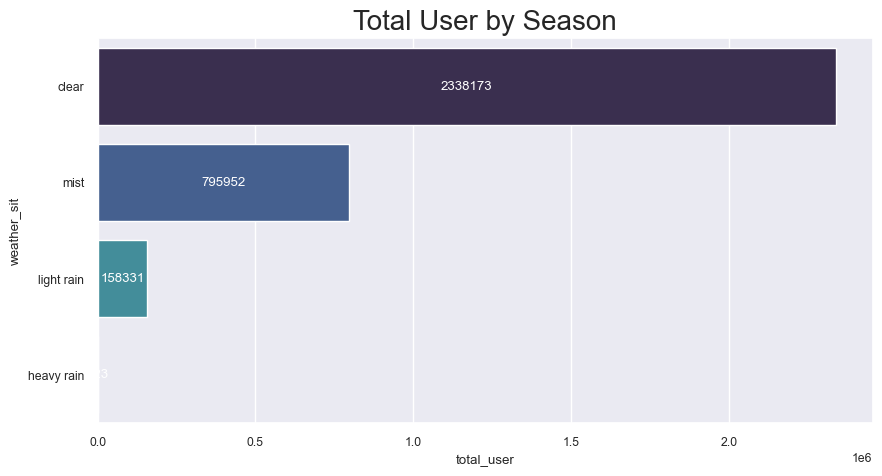

In [188]:
plt.figure(figsize=(10,5))
plt.title('Total User by Season', size=20)
sns.set(font_scale=0.8)
graph = sns.barplot(data=weather_user, x='total_user', y='weather_sit', orient='h', palette='mako')
for i in graph.containers:
    graph.bar_label(i, fmt='%d', label_type='center', color='white')
plt.show()


Disimpulkan bahwa user pesepeda sangat menyukai bersepeda ketika cuaca sedang cerah/clear, sehingga melalui plot tersebut sangat mendominasi. 

--------------------------------------------------

### 2. Bagaimana perkembangan jumlah user berdasarkan bulannya?

In [190]:
month_user = hour.groupby('month').agg({
    'registered_user': 'sum',
    'casual_user': 'sum',
    'total_user': 'sum'
}).reset_index()

month_user['index'] = [3,7,11,1,0,6,5,2,4,10,9,8]
month_user = month_user.sort_values(by='index')

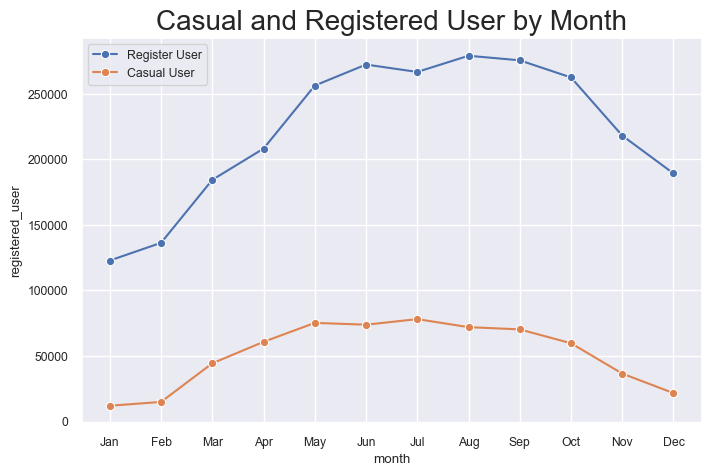

In [178]:
plt.figure(figsize=(8,5))
plt.title('Casual and Registered User by Month', size=20)
sns.lineplot(data=month_user, x='month', y='registered_user', marker='o', label='Register User')
sns.lineplot(data=month_user, x='month', y='casual_user', marker='o', label='Casual User')
plt.legend()
plt.show()


Melalui plot tersebut, diketahui bahwa perbedaan jumlah user antara yang telah teregistrasi dan casual cukup jauh, namun jumlah register user cenderung meningkat sepanjang tahun, berbeda dengan casual user yang cenderung menurun menjelang akhir tahun.

Saya mengasumsikan bahwa casual user mendaftar dalam bike sharing sehingga jumlah user yang telah teregistrasi meningkat.

--------------------------------------------------

### 3. Pada jam berapa user bike sharing system paling sering digunakan?

In [114]:
hour_user = hour.groupby('hour').agg({
    'total_user': 'sum',
}).reset_index().sort_values(by='hour')

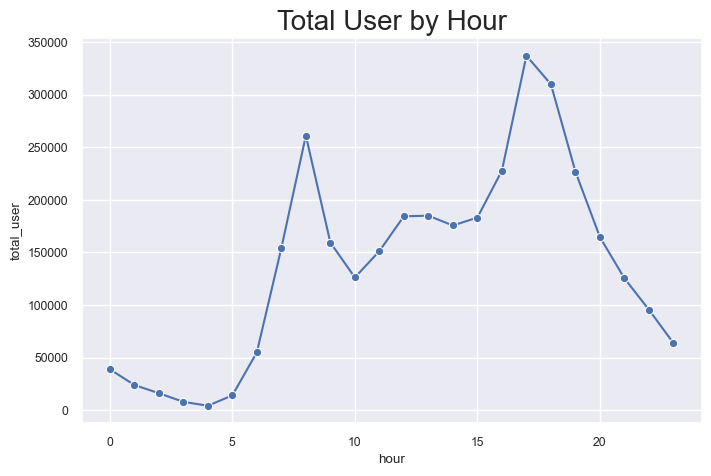

In [177]:
plt.figure(figsize=(8,5))
plt.title('Total User by Hour', size=20)
sns.lineplot(data=hour_user, x='hour', y='total_user', marker='o')
plt.show()


Diketahui bahwa jumlah user meningkat setelah melewati jam 05.00 dan menurun setelah mendekati jam 20.00, artinya user lebih menggunakan sepeda ketika siang hari untuk aktivitasnya.

--------------------------------------------------

## Kesimpulan

In [189]:
hour_temp = hour.groupby('month').agg({
    'temprature': 'mean',
    'total_user': 'sum'
}).reset_index().sort_values(by='month')

hour_temp['index'] = [3,7,11,1,0,6,5,2,4,10,9,8]
hour_temp = hour_temp.sort_values(by='index')

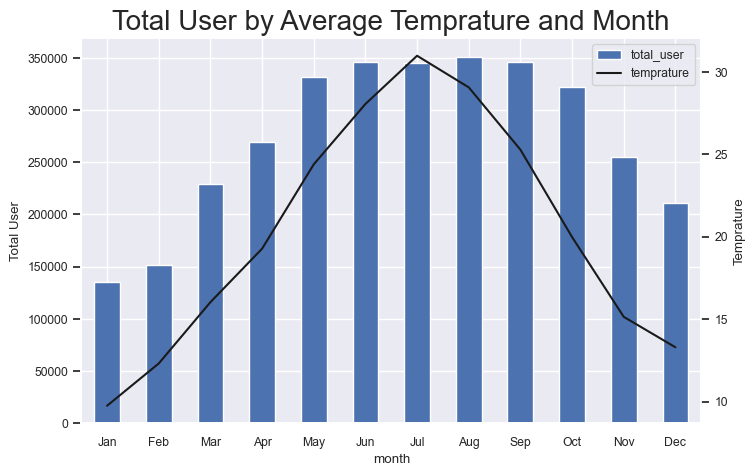

In [195]:
ax = hour_temp.plot.bar(y='total_user',x='month', ylabel='Total User', figsize=(8, 5))
hour_temp.plot(y='temprature', c='k', ax=ax, use_index=False, secondary_y=True, mark_right=False)
plt.title('Total User by Average Temprature and Month', size=20)
ax.right_ax.set_ylabel('Temprature');

### Analysis

Diketahui bahwa selama sepanjang tahun pengguna bike sharing system menyukai bersepeda ketika di siang hari dengan temprature yang hangat, dengan begitu jumlah userpun meningkat. Dapat dilihat diantara bulan maret hingga september jumlah user sangatlah tinggi, penyebabnya adalah meningkatnya temprature yang melebihi 20°C.